In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Loading the data

In [2]:

team_mapping = {
    'Köln': 'FC Koln',
    'Hamburger SV': 'Hamburg',
    'Hannover 96': 'Hannover',
    'Hertha BSC': 'Hertha',
    "M'Gladbach": "M'gladbach",
    'Mainz 05':'Mainz',
    "Nürnberg": "Nurnberg",
    'Eint Frankfurt': 'Ein Frankfurt',
    'St. Pauli': 'St Pauli',
    'Düsseldorf' : 'Fortuna Dusseldorf',
    'Greuther Fürth' :'Greuther Furth',
    'Paderborn 07' : 'Paderborn',
    'Darmstadt 98' : 'Darmstadt',
    'Ingolstadt 04': 'Ingolstadt',
    'Arminia':'Bielefeld',
} #renaming teams so they match from fbred to fbd




In [3]:
#bundesliga
#saving each season as a data frame
#Data frames from Football-Data
df1_fbd = pd.read_csv("b0910.csv")
df2_fbd = pd.read_csv("b1011.csv")
df3_fbd = pd.read_csv("b1112.csv")
df4_fbd = pd.read_csv("b1213.csv")
df5_fbd = pd.read_csv("b1314.csv")
df6_fbd = pd.read_csv("b1415.csv")
df7_fbd = pd.read_csv("b1516.csv")
df8_fbd = pd.read_csv("b1617.csv")
df9_fbd = pd.read_csv("b1718.csv")
df10_fbd = pd.read_csv("b1819.csv")
df11_fbd = pd.read_csv("b1920.csv")
df12_fbd = pd.read_csv("b2021.csv")



#2009/10 Season
df1_fbd = df1_fbd.iloc[:, :22] #removing betting data
df1_fbref = pd.read_html('https://fbref.com/en/comps/20/2009-2010/2009-2010-Bundesliga-Stats')[0]
df1_fbref = df1_fbref.iloc[:, [1,11]] #extracting the home team and attendance
df1_fbref['Squad'] = df1_fbref['Squad'].replace(team_mapping) #renaming
df1 = df1_fbd.merge(df1_fbref, left_on='HomeTeam', right_on = 'Squad', how='left')
df1 = df1.drop('Squad', axis=1)


#2010/11 Season
df2_fbd = df2_fbd.iloc[:, :22] #removing betting data
df2_fbref = pd.read_html('https://fbref.com/en/comps/20/2010-2011/2010-2011-Bundesliga-Stats')[0]
df2_fbref = df2_fbref.iloc[:, [1,11]] #extracting the home team and attendance
df2_fbref['Squad'] = df2_fbref['Squad'].replace(team_mapping) #renaming
df2 = df2_fbd.merge(df2_fbref, left_on='HomeTeam', right_on = 'Squad', how='left')
#left_on use 'HomeTeam' column in df_1 as the key    
#right_on use 'Squad' column as the key in df1
#how = 'left' perform a left jont -
df2= df2.drop('Squad', axis =1) #remvong squad column


#2011/12 Season
df3_fbd = df3_fbd.iloc[:, :22] #removing betting data
df3_fbref = pd.read_html('https://fbref.com/en/comps/20/2011-2012/2011-2012-Bundesliga-Stats')[0]
df3_fbref = df3_fbref.iloc[:, [1,11]] #extracting the home team and attendance
df3_fbref['Squad'] = df3_fbref['Squad'].replace(team_mapping) #renaming
df3 = df3_fbd.merge(df3_fbref, left_on='HomeTeam', right_on = 'Squad', how='left')
df3 = df3.drop('Squad', axis =1) #remvong squad column


#2012/13 Season
df4_fbd = df4_fbd.iloc[:, :22] #removing betting data
df4_fbref = pd.read_html('https://fbref.com/en/comps/20/2012-2013/2012-2013-Bundesliga-Stats')[0]
df4_fbref = df4_fbref.iloc[:, [1,11]] #extracting the home team and attendance
df4_fbref['Squad'] = df4_fbref['Squad'].replace(team_mapping) #renaming
df4 = df4_fbd.merge(df4_fbref, left_on='HomeTeam', right_on = 'Squad', how='left')
df4 =df4.drop('Squad', axis =1) #remvong squad column

#2013/14 Season
df5_fbd = df5_fbd.iloc[:, :22] #removing betting data
df5_fbref = pd.read_html('https://fbref.com/en/comps/20/2013-2014/2013-2014-Bundesliga-Stats')[0]
df5_fbref = df5_fbref.iloc[:, [1,11]] #extracting the home team and attendance
df5_fbref['Squad'] = df5_fbref['Squad'].replace(team_mapping) #renaming
df5 = df5_fbd.merge(df5_fbref, left_on='HomeTeam', right_on = 'Squad', how='left')
df5 = df5.drop('Squad', axis =1) #remvong squad column


#2014/15
df6_fbd = df6_fbd.iloc[:, :22]
df6_fbref=pd.read_html('https://fbref.com/en/comps/20/2014-2015/schedule/2014-2015-Bundesliga-Scores-and-Fixtures')[0]
df6_fbref = df6_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [5, 7,8]] 
df6_fbref['Home'] = df6_fbref['Home'].replace(team_mapping)
df6_fbref['Away'] = df6_fbref['Away'].replace(team_mapping)
df6 = df6_fbd.merge(df6_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df6_fbd['Attendance'] = df6['Attendance']
df6 = df6.drop(['Home', 'Away'], axis =1)

#2015/16
df7_fbd = df7_fbd.iloc[:, :22]
df7_fbref=pd.read_html('https://fbref.com/en/comps/20/2015-2016/schedule/2015-2016-Bundesliga-Scores-and-Fixtures')[0]
df7_fbref = df7_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [5, 7,8]] 
df7_fbref['Home'] = df7_fbref['Home'].replace(team_mapping)
df7_fbref['Away'] = df7_fbref['Away'].replace(team_mapping)
df7 = df7_fbd.merge(df7_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df7_fbd['Attendance'] = df7['Attendance']
df7 = df7.drop(['Home', 'Away'], axis =1)

#2016/17
df8_fbd = df8_fbd.iloc[:, :22]
df8_fbref=pd.read_html('https://fbref.com/en/comps/20/2016-2017/schedule/2016-2017-Bundesliga-Scores-and-Fixtures')[0]
df8_fbref = df8_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [5, 7,8]] 
df8_fbref['Home'] = df8_fbref['Home'].replace(team_mapping)
df8_fbref['Away'] = df8_fbref['Away'].replace(team_mapping)
df8 = df8_fbd.merge(df8_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df8_fbd['Attendance'] = df8['Attendance']
df8 = df8.drop(['Home', 'Away'], axis =1)

#2017/18
df9_fbd = df9_fbd.iloc[:, :22]
df9_fbref=pd.read_html('https://fbref.com/en/comps/20/2017-2018/schedule/2017-2018-Bundesliga-Scores-and-Fixtures')[0]
df9_fbref = df9_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [5, 9,10]] 
df9_fbref['Home'] = df9_fbref['Home'].replace(team_mapping)
df9_fbref['Away'] = df9_fbref['Away'].replace(team_mapping)
df9 = df9_fbd.merge(df9_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df9_fbd['Attendance'] = df9['Attendance']
df9 = df9.drop(['Home', 'Away'], axis =1)

#2018/19
df10_fbd = df10_fbd.iloc[:, :22]
df10_fbref=pd.read_html('https://fbref.com/en/comps/20/2018-2019/schedule/2018-2019-Bundesliga-Scores-and-Fixtures')[0]
df10_fbref = df10_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [5, 9,10]] 
df10_fbref['Home'] = df10_fbref['Home'].replace(team_mapping)
df10_fbref['Away'] = df10_fbref['Away'].replace(team_mapping)
df10 = df10_fbd.merge(df10_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df10_fbd['Attendance'] = df10['Attendance']
df10 = df10.drop(['Home', 'Away'], axis =1)

#2019/20
df11_fbd = df11_fbd.iloc[:, :23]
df11_fbref=pd.read_html('https://fbref.com/en/comps/20/2019-2020/schedule/2019-2020-Bundesliga-Scores-and-Fixtures')[0]
df11_fbref = df11_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [5, 9,10]] 
df11_fbref['Home'] = df11_fbref['Home'].replace(team_mapping)
df11_fbref['Away'] = df11_fbref['Away'].replace(team_mapping)
df11 = df11_fbd.merge(df11_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df11_fbd['Attendance'] = df11['Attendance']
df11 = df11.drop(['Home', 'Away'], axis =1)

#2020/21
df12_fbd = df12_fbd.iloc[:, :23]
df12_fbref=pd.read_html('https://fbref.com/en/comps/20/2020-2021/schedule/2020-2021-Bundesliga-Scores-and-Fixtures')[0]
df12_fbref = df12_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [5, 9,10]] 
df12_fbref['Home'] = df12_fbref['Home'].replace(team_mapping)
df12_fbref['Away'] = df12_fbref['Away'].replace(team_mapping)
df12 = df12_fbd.merge(df12_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df12_fbd['Attendance'] = df12['Attendance']
df12 = df12.drop(['Home', 'Away'], axis =1)

bundesliga = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], axis=0).reset_index(drop=True)

# Save the combined DataFrame to a new CSV file
bundesliga.to_csv('bundesliga.csv', index=False)

# Adding Season 

In [4]:
# Create a 'Season' column with the specified values
start_year = 2009
bundesliga['Season'] = [f"{start_year + i // 306}/{start_year + i // 306 + 1}" for i in range(len(bundesliga))]

# Move the 'season' column to be the second column
bundesliga.insert(1, 'Season', bundesliga.pop('Season'))
#column is created to differeciate between seasons easily, which helps with the creation of the new varibales





# Data Cleaning

In [5]:
bundesliga.head(10)

,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HF,AF,HC,AC,HY,AY,HR,AR,Attendance,Time
0,D1,2009/2010,07/08/09,Wolfsburg,Stuttgart,2,0,H,0,0,...,12,12,6,3,0,0,0,0,29232.0,NaN
1,D1,2009/2010,08/08/09,Dortmund,FC Koln,1,0,H,0,0,...,8,10,16,1,0,1,0,0,77268.0,NaN
2,D1,2009/2010,08/08/09,Hertha,Hannover,1,0,H,0,0,...,16,20,5,3,3,2,0,0,46681.0,NaN
3,D1,2009/2010,08/08/09,Hoffenheim,Bayern Munich,1,1,D,1,1,...,10,28,3,10,0,2,0,0,29690.0,NaN
4,D1,2009/2010,08/08/09,Mainz,Leverkusen,2,2,D,1,2,...,22,28,3,5,1,2,0,0,20138.0,NaN
5,D1,2009/2010,08/08/09,Nurnberg,Schalke 04,1,2,A,0,1,...,14,21,9,6,2,1,0,0,42336.0,NaN
6,D1,2009/2010,08/08/09,Werder Bremen,Ein Frankfurt,2,3,A,2,2,...,18,20,9,3,1,2,1,0,35990.0,NaN
7,D1,2009/2010,09/08/09,Bochum,M'gladbach,3,3,D,0,3,...,13,21,11,5,3,1,0,1,24842.0,NaN
8,D1,2009/2010,09/08/09,Freiburg,Hamburg,1,1,D,0,1,...,22,19,12,6,2,1,0,0,22959.0,NaN
9,D1,2009/2010,15/08/09,Bayern Munich,Werder Bremen,1,1,D,0,1,...,13,9,5,2,1,0,0,0,69000.0,NaN


In [6]:
bundesliga.tail(30)

,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HF,AF,HC,AC,HY,AY,HR,AR,Attendance,Time
3642,D1,2020/2021,03/05/2021,Mainz,Hertha,1,1,D,1,1,...,18,13,6,4,2,3,0,0,NaN,17:00
3643,D1,2020/2021,06/05/2021,Hertha,Freiburg,3,0,H,2,0,...,10,13,4,6,4,3,0,0,NaN,17:30
3644,D1,2020/2021,07/05/2021,Stuttgart,Augsburg,2,1,H,1,0,...,14,12,2,12,0,0,0,0,NaN,19:30
3645,D1,2020/2021,08/05/2021,Dortmund,RB Leipzig,3,2,H,1,0,...,8,13,7,7,1,1,0,0,NaN,14:30
3646,D1,2020/2021,08/05/2021,Hoffenheim,Schalke 04,4,2,H,0,2,...,11,12,9,3,1,2,0,0,NaN,14:30
3647,D1,2020/2021,08/05/2021,Werder Bremen,Leverkusen,0,0,D,0,0,...,9,14,4,6,3,2,1,0,NaN,14:30
3648,D1,2020/2021,08/05/2021,Wolfsburg,Union Berlin,3,0,H,1,0,...,9,9,4,3,1,0,0,0,NaN,14:30
3649,D1,2020/2021,08/05/2021,Bayern Munich,M'gladbach,6,0,H,4,0,...,3,9,5,3,0,2,1,0,NaN,17:30
3650,D1,2020/2021,09/05/2021,FC Koln,Freiburg,1,4,A,0,2,...,15,16,3,2,2,2,0,0,NaN,12:30
3651,D1,2020/2021,09/05/2021,Ein Frankfurt,Mainz,1,1,D,0,1,...,10,14,8,2,2,0,0,0,NaN,14:30


In [7]:
bundesliga.shape

(3672, 25)

In [8]:
bundesliga.isnull().sum()

Div              0
Season           0
Date             0
HomeTeam         0
AwayTeam         0
FTHG             0
FTAG             0
FTR              0
HTHG             0
HTAG             0
HTR              0
HS               0
AS               0
HST              0
AST              0
HF               0
AF               0
HC               0
AC               0
HY               0
AY               0
HR               0
AR               0
Attendance     353
Time          3060
dtype: int64

In [9]:
#removing the time axis
bundesliga = bundesliga.drop('Time', axis=1)

In [10]:
#checking if any of the attendance missing values were pre covid
bundesliga_pre_covid = bundesliga.iloc[0:3282]
bundesliga_pre_covid['Attendance'].isnull().sum()

0

In [11]:
#replaceing all NaN attendance points with zero
bundesliga['Attendance'].fillna(0, inplace=True) 

In [12]:
#rechecking to now see if there are any missing data points
bundesliga.isnull().sum()

Div           0
Season        0
Date          0
HomeTeam      0
AwayTeam      0
FTHG          0
FTAG          0
FTR           0
HTHG          0
HTAG          0
HTR           0
HS            0
AS            0
HST           0
AST           0
HF            0
AF            0
HC            0
AC            0
HY            0
AY            0
HR            0
AR            0
Attendance    0
dtype: int64

In [13]:
bundesliga.dtypes
#changing all integer number to floats


Div            object
Season         object
Date           object
HomeTeam       object
AwayTeam       object
FTHG            int64
FTAG            int64
FTR            object
HTHG            int64
HTAG            int64
HTR            object
HS              int64
AS              int64
HST             int64
AST             int64
HF              int64
AF              int64
HC              int64
AC              int64
HY              int64
AY              int64
HR              int64
AR              int64
Attendance    float64
dtype: object

In [14]:
bundesliga.duplicated().sum()

0

In [15]:
bundesliga.nunique(axis=0)

Div              1
Season          12
Date          1154
HomeTeam        30
AwayTeam        30
FTHG            10
FTAG             9
FTR              3
HTHG             7
HTAG             6
HTR              3
HS              35
AS              31
HST             17
AST             15
HF              30
AF              32
HC              20
AC              15
HY               9
AY               8
HR               3
AR               4
Attendance    1087
dtype: int64

In [16]:
#checking all data points are in line
print("FTR", set(bundesliga['FTR'].tolist()))
print("HTR",set(bundesliga['HTR'].tolist()))
print("FTHG",set(bundesliga['FTHG'].tolist()))
print("FTAG",set(bundesliga['FTAG'].tolist()))
print("HTHG",set(bundesliga['HTHG'].tolist()))
print("HTAG",set(bundesliga['HTAG'].tolist()))
print("HS",set(bundesliga['HS'].tolist()))
print("AS",set(bundesliga['AS'].tolist()))
print("HST",set(bundesliga['HST'].tolist()))
print("AST",set(bundesliga['AST'].tolist()))
print("HF",set(bundesliga['HF'].tolist()))
print("AF",set(bundesliga['AF'].tolist()))
print("HC",set(bundesliga['HC'].tolist()))
print("AC",set(bundesliga['AC'].tolist()))
print("HY",set(bundesliga['HY'].tolist()))
print("AY",set(bundesliga['AY'].tolist()))
print("HR",set(bundesliga['HR'].tolist()))
print("AR",set(bundesliga['AR'].tolist()))
print("Season",set(bundesliga['Season'].tolist()))

FTR {'A', 'D', 'H'}
HTR {'A', 'D', 'H'}
FTHG {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
FTAG {0, 1, 2, 3, 4, 5, 6, 7, 8}
HTHG {0, 1, 2, 3, 4, 5, 6}
HTAG {0, 1, 2, 3, 4, 5}
HS {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36}
AS {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 32, 33}
HST {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}
AST {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
HF {2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32}
AF {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32}
HC {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
AC {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
HY {0, 1, 2, 3, 4, 5, 6, 7, 8}
AY {0, 1, 2, 3, 4, 5, 6, 7}
HR {0, 1, 2}
AR {0, 1, 2, 3}
Season {'2019/

In [17]:
bundesliga.describe().T

,count,mean,std,min,25%,50%,75%,max
FTHG,3672.0,1.641612,1.359848,0.0,1.00,1.0,2.0,9.0
FTAG,3672.0,1.306100,1.220673,0.0,0.00,1.0,2.0,8.0
HTHG,3672.0,0.722767,0.853435,0.0,0.00,1.0,1.0,6.0
HTAG,3672.0,0.564542,0.740453,0.0,0.00,0.0,1.0,5.0
HS,3672.0,14.116830,5.139696,1.0,10.00,14.0,17.0,36.0
AS,3672.0,11.655501,4.670955,0.0,8.00,11.0,15.0,33.0
HST,3672.0,5.129902,2.643796,0.0,3.00,5.0,7.0,16.0
AST,3672.0,4.264706,2.414132,0.0,2.00,4.0,6.0,14.0
HF,3672.0,14.017157,4.506478,2.0,11.00,14.0,17.0,32.0
AF,3672.0,14.867919,4.740930,1.0,11.75,15.0,18.0,32.0


In [18]:
bundesliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Div         3672 non-null   object 
 1   Season      3672 non-null   object 
 2   Date        3672 non-null   object 
 3   HomeTeam    3672 non-null   object 
 4   AwayTeam    3672 non-null   object 
 5   FTHG        3672 non-null   int64  
 6   FTAG        3672 non-null   int64  
 7   FTR         3672 non-null   object 
 8   HTHG        3672 non-null   int64  
 9   HTAG        3672 non-null   int64  
 10  HTR         3672 non-null   object 
 11  HS          3672 non-null   int64  
 12  AS          3672 non-null   int64  
 13  HST         3672 non-null   int64  
 14  AST         3672 non-null   int64  
 15  HF          3672 non-null   int64  
 16  AF          3672 non-null   int64  
 17  HC          3672 non-null   int64  
 18  AC          3672 non-null   int64  
 19  HY          3672 non-null  

# Adding New Variables

In [19]:
# Home team average goals scored at home full time
bundesliga['HAGSFT'] = (
    bundesliga.groupby(['Season', 'HomeTeam'])['FTHG']  # Grouping by season and home team, selecting FTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)


#Away team average goals scored away full time 
bundesliga['AAGSFT'] = (
    bundesliga.groupby(['Season', 'AwayTeam'])['FTAG'] #Grouping by season and home team, selecting FTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average goals scored at home half time
bundesliga['HAGSHT'] = (
    bundesliga.groupby(['Season', 'HomeTeam'])['HTHG'] #Grouping by season and home team, selecting FTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average goals scored away half time 
bundesliga['AAGSHT'] = (
    bundesliga.groupby(['Season', 'AwayTeam'])['HTAG'] #Grouping by season and home team, selecting FTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



# Home team average goals conceded at home fill time
bundesliga['HAGCFT'] = (
    bundesliga.groupby(['Season', 'HomeTeam'])['FTAG']  # Grouping by season and home team, selecting FTAG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

# Away team average goals conceded away full time 
bundesliga['AAGCFT'] = (
    bundesliga.groupby(['Season', 'AwayTeam'])['FTHG']  # Grouping by season and away team, selecting FTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)


#Home team average red cards at home 
bundesliga['HAR'] = (
    bundesliga.groupby(['Season', 'HomeTeam'])['HR'] #Grouping by season and home team, selecting FTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average red cards away 
bundesliga['AAR'] = (
    bundesliga.groupby(['Season', 'AwayTeam'])['AR'] #Grouping by season and home team, selecting FTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average yellow cards at home 
bundesliga['HAY'] = (
    bundesliga.groupby(['Season', 'HomeTeam'])['HY'] #Grouping by season and home team, selecting FTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average yellow cards away 
bundesliga['AAY'] = (
    bundesliga.groupby(['Season', 'AwayTeam'])['AY'] #Grouping by season and home team, selecting FTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)


#Home team average fouls at home 
bundesliga['HAF'] = (
    bundesliga.groupby(['Season', 'HomeTeam'])['HF'] #Grouping by season and home team, selecting FTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average fouls away 
bundesliga['AAF'] = (
    bundesliga.groupby(['Season', 'AwayTeam'])['AF'] #Grouping by season and home team, selecting FTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average corners at home 
bundesliga['HAC'] = (
    bundesliga.groupby(['Season', 'HomeTeam'])['HC'] #Grouping by season and home team, selecting FTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average corners away 
bundesliga['AAC'] = (
    bundesliga.groupby(['Season', 'AwayTeam'])['AC'] #Grouping by season and home team, selecting FTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average shots at home 
bundesliga['HAS'] = (
    bundesliga.groupby(['Season', 'HomeTeam'])['HS'] #Grouping by season and home team, selecting FTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average shots away 
bundesliga['AAS'] = (
    bundesliga.groupby(['Season', 'AwayTeam'])['AS'] #Grouping by season and home team, selecting FTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average shots on target at home 
bundesliga['HAST'] = (
    bundesliga.groupby(['Season', 'HomeTeam'])['HST'] #Grouping by season and home team, selecting FTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average shots on target away 
bundesliga['AAST'] = (
    bundesliga.groupby(['Season', 'AwayTeam'])['AST'] #Grouping by season and home team, selecting FTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)







#Home team percentage of games won, lost and drawn at home
# Create new columns to store cumulative statistics for each HomeTeam's away games
bundesliga['home_games'] = 0
bundesliga['home_won'] = 0
bundesliga['home_lost'] = 0
bundesliga['home_drawn'] = 0

# Create dictionary to keep track of cumulative statistics for each HomeTeam within each season
cumulative_stats_by_season = {}

# Iterate through each row 
for index, row in bundesliga.iterrows():
    home_team = row['HomeTeam']
    season = row['Season']

    # If the AwayTeam is not in the dictionary for the current season, all stats are zero
    if (home_team, season) not in cumulative_stats_by_season:
        cumulative_stats_by_season[(home_team, season)] = {'home_games': 0, 'home_won': 0, 'home_lost': 0, 'home_drawn': 0}

    # Update cumulative statistics based on the 'FTR' result
    cumulative_stats_by_season[(home_team, season)]['home_games'] += 1
    cumulative_stats_by_season[(home_team, season)]['home_won'] += (row['FTR'] == 'H')
    cumulative_stats_by_season[(home_team, season)]['home_lost'] += (row['FTR'] == 'A')
    cumulative_stats_by_season[(home_team, season)]['home_drawn'] += (row['FTR'] == 'D')

    # Assign cumulative statistics to the corresponding columns in the DataFrame
    bundesliga.at[index, 'home_games'] = cumulative_stats_by_season[(home_team, season)]['home_games']
    bundesliga.at[index, 'home_won'] = cumulative_stats_by_season[(home_team, season)]['home_won']
    bundesliga.at[index, 'home_lost'] = cumulative_stats_by_season[(home_team, season)]['home_lost']
    bundesliga.at[index, 'home_drawn'] = cumulative_stats_by_season[(home_team, season)]['home_drawn']

    # If it's the first match of a new season, reset the cumulative stats for that AwayTeam
    if index > 0 and season != bundesliga.at[index - 1, 'Season']:
        cumulative_stats_by_season[(home_team, season)] = {'home_games': 0, 'home_won': 0, 'home_lost': 0, 'home_drawn': 0}

#For each team shift the statsitcs down a row 
bundesliga['home_won'] = bundesliga.groupby('HomeTeam')['home_won'].transform(lambda x: x.shift(1))
bundesliga['home_drawn'] = bundesliga.groupby('HomeTeam')['home_drawn'].transform(lambda x: x.shift(1))
bundesliga['home_lost'] = bundesliga.groupby('HomeTeam')['home_lost'].transform(lambda x: x.shift(1))
bundesliga['home_games'] = bundesliga.groupby('HomeTeam')['home_games'].transform(lambda x: x.shift(1))
# Replace NaN values in the columns with 0
bundesliga['home_won'].fillna(0, inplace=True)
bundesliga['home_drawn'].fillna(0, inplace=True)
bundesliga['home_lost'].fillna(0, inplace=True)
bundesliga['home_games'].fillna(0, inplace=True)


#calculate the means for each row
bundesliga['HAWH'] = bundesliga['home_won'] / bundesliga['home_games']
bundesliga['HALH'] = bundesliga['home_lost'] / bundesliga['home_games']
bundesliga['HADH'] = bundesliga['home_drawn'] / bundesliga['home_games']


# Identify the first row of each AwayTeam in a new season
first_row_mask = bundesliga.groupby(['Season', 'HomeTeam']).cumcount() == 0
# Set the values to zero
bundesliga.loc[first_row_mask, ['HAWH', 'HALH', 'HADH']] = 0

#Remove the rows from the data frame 
bundesliga =bundesliga.drop(columns=['home_won','home_lost','home_drawn','home_games'],axis=1)







#Away team decimal of games won lost and drawn at home per season
# Create new columns to store cumulative statistics for each AwayTeam's away games
bundesliga['away_games'] = 0
bundesliga['away_won'] = 0
bundesliga['away_lost'] = 0
bundesliga['away_drawn'] = 0

# Create dictionary to keep track of cumulative statistics for each AwayTeam within each season
cumulative_stats_by_season = {}

# Iterate through each row 
for index, row in bundesliga.iterrows():
    away_team = row['AwayTeam']
    season = row['Season']

    # If the AwayTeam is not in the dictionary for the current season, all stats are zero
    if (away_team, season) not in cumulative_stats_by_season:
        cumulative_stats_by_season[(away_team, season)] = {'away_games': 0, 'away_won': 0, 'away_lost': 0, 'away_drawn': 0}

    # Update cumulative statistics based on the 'FTR' result
    cumulative_stats_by_season[(away_team, season)]['away_games'] += 1
    cumulative_stats_by_season[(away_team, season)]['away_won'] += (row['FTR'] == 'A')
    cumulative_stats_by_season[(away_team, season)]['away_lost'] += (row['FTR'] == 'H')
    cumulative_stats_by_season[(away_team, season)]['away_drawn'] += (row['FTR'] == 'D')

    # Assign cumulative statistics to the corresponding columns in the DataFrame
    bundesliga.at[index, 'away_games'] = cumulative_stats_by_season[(away_team, season)]['away_games']
    bundesliga.at[index, 'away_won'] = cumulative_stats_by_season[(away_team, season)]['away_won']
    bundesliga.at[index, 'away_lost'] = cumulative_stats_by_season[(away_team, season)]['away_lost']
    bundesliga.at[index, 'away_drawn'] = cumulative_stats_by_season[(away_team, season)]['away_drawn']

    # If it's the first match of a new season, reset the cumulative stats for that AwayTeam
    if index > 0 and season != bundesliga.at[index - 1, 'Season']:
        cumulative_stats_by_season[(away_team, season)] = {'away_games': 0, 'away_won': 0, 'away_lost': 0, 'away_drawn': 0}

#For each team shift the statsitcs down a row 
bundesliga['away_won'] = bundesliga.groupby('AwayTeam')['away_won'].transform(lambda x: x.shift(1))
bundesliga['away_drawn'] = bundesliga.groupby('AwayTeam')['away_drawn'].transform(lambda x: x.shift(1))
bundesliga['away_lost'] = bundesliga.groupby('AwayTeam')['away_lost'].transform(lambda x: x.shift(1))
bundesliga['away_games'] = bundesliga.groupby('AwayTeam')['away_games'].transform(lambda x: x.shift(1))
# Replace NaN values in the columns with 0
bundesliga['away_won'].fillna(0, inplace=True)
bundesliga['away_drawn'].fillna(0, inplace=True)
bundesliga['away_lost'].fillna(0, inplace=True)
bundesliga['away_games'].fillna(0, inplace=True)

#calculate the means for each row
bundesliga['AAWA'] = bundesliga['away_won'] / bundesliga['away_games']
bundesliga['AALA'] = bundesliga['away_lost'] / bundesliga['away_games']
bundesliga['AADA'] = bundesliga['away_drawn'] / bundesliga['away_games']


# Identify the first row of each AwayTeam in a new season
first_row_mask = bundesliga.groupby(['Season', 'AwayTeam']).cumcount() == 0
# Set the values to zero
bundesliga.loc[first_row_mask, ['AAWA', 'AALA', 'AADA']] = 0

#Remove the rows from the data frame 
bundesliga =bundesliga.drop(columns=['away_won','away_lost','away_drawn','away_games'],axis=1)

In [20]:
bundesliga

,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HAS,AAS,HAST,AAST,HAWH,HALH,HADH,AAWA,AALA,AADA
0,D1,2009/2010,07/08/09,Wolfsburg,Stuttgart,2,0,H,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,D1,2009/2010,08/08/09,Dortmund,FC Koln,1,0,H,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,D1,2009/2010,08/08/09,Hertha,Hannover,1,0,H,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,D1,2009/2010,08/08/09,Hoffenheim,Bayern Munich,1,1,D,1,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,D1,2009/2010,08/08/09,Mainz,Leverkusen,2,2,D,1,2,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,D1,2020/2021,22/05/2021,Hoffenheim,Hertha,2,1,H,0,1,...,11.2500,9.6875,5.0625,3.6875,0.4375,0.3750,0.1875,0.1875,0.4375,0.3750
3668,D1,2020/2021,22/05/2021,Stuttgart,Bielefeld,0,2,A,0,0,...,13.3125,9.0000,4.5000,2.8750,0.3125,0.3125,0.3750,0.1250,0.5000,0.3750
3669,D1,2020/2021,22/05/2021,Union Berlin,RB Leipzig,2,1,H,0,0,...,12.8750,13.8750,4.9375,5.8750,0.4375,0.0625,0.5000,0.5000,0.2500,0.2500
3670,D1,2020/2021,22/05/2021,Werder Bremen,M'gladbach,2,4,A,0,1,...,11.6250,13.3750,3.7500,5.2500,0.1875,0.5000,0.3125,0.2500,0.3750,0.3750


In [21]:
#Adding a new column for if the match was pre or during covid
# Set 'pre_covid' to True for rows up to index 3282, and False for rows after that index
bundesliga['Pre_covid'] = bundesliga.index <= 3282


bundesliga_pre_covid = bundesliga[bundesliga['Pre_covid'] == True]
bundesliga_during_covid = bundesliga[bundesliga['Pre_covid'] == False]

In [22]:
sorted(bundesliga_during_covid['HomeTeam'].unique())


['Augsburg',
 'Bayern Munich',
 'Bielefeld',
 'Dortmund',
 'Ein Frankfurt',
 'FC Koln',
 'Fortuna Dusseldorf',
 'Freiburg',
 'Hertha',
 'Hoffenheim',
 'Leverkusen',
 "M'gladbach",
 'Mainz',
 'Paderborn',
 'RB Leipzig',
 'Schalke 04',
 'Stuttgart',
 'Union Berlin',
 'Werder Bremen',
 'Wolfsburg']

In [23]:
#Adding home and away points 
bundesliga['HomeTeamPoints'] = 0
bundesliga['AwayTeamPoints'] = 0

# Function to update points based on match result
def update_points(row):
    if row['FTR'] == 'H':
        row['HomeTeamPoints'] += 3
    elif row['FTR'] == 'D':
        row['HomeTeamPoints'] += 1
        row['AwayTeamPoints'] += 1
    elif row['FTR'] == 'A':
        row['AwayTeamPoints'] += 3
    return row

# Apply the update_points function to each row
bundesliga = bundesliga.apply(update_points, axis=1)

# Create running tally of points for each team for each season
bundesliga['HomeTeamPoints'] = bundesliga.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].cumsum()
bundesliga['AwayTeamPoints'] = bundesliga.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].cumsum()




# Create a DataFrame to store total points for each team within each season
total_points_home = bundesliga.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].max().reset_index()
total_points_away = bundesliga.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].max().reset_index()

# Merge the DataFrames to combine home and away points
total_points = pd.merge(total_points_home, total_points_away, how='outer', left_on=['Season', 'HomeTeam'], right_on=['Season', 'AwayTeam'], suffixes=('_Home', '_Away'))

# Calculate total points for each team by combining home and away points
total_points['TotalPoints'] = total_points['HomeTeamPoints'] + total_points['AwayTeamPoints']

# Calculate HA as the ratio of home points to the sum of home points and away points to 4 decimal places
total_points['SeasonalHA'] = round(total_points['HomeTeamPoints'] / (total_points['HomeTeamPoints'] + total_points['AwayTeamPoints']), 4)

# Calculate OverallHA for each team by summing overall home points and away points, then applying the formula H / (H + A) to 4 decimal places
overall_ha = total_points.groupby('HomeTeam', as_index=False).agg({'HomeTeamPoints': 'sum', 'AwayTeamPoints': 'sum'})
overall_ha['OverallHA'] = round(overall_ha['HomeTeamPoints'] / (overall_ha['HomeTeamPoints'] + overall_ha['AwayTeamPoints']), 4)


# Merge SeasonalHA and OverallHA into the total_points DataFrame
total_points = pd.merge(total_points, overall_ha[['HomeTeam', 'OverallHA']], how='left', left_on='HomeTeam', right_on='HomeTeam')

# Sort the DataFrame by 'Season' and 'TotalPoints' columns
total_points = total_points.sort_values(by=['Season', 'TotalPoints'], ascending=[True, False])

total_points = total_points[['Season', 'HomeTeam', 'HomeTeamPoints', 'AwayTeamPoints', 'TotalPoints', 'SeasonalHA', 'OverallHA']]


# Display the resulting DataFrame with the specified columns
print(total_points.tail(18))



        Season       HomeTeam  HomeTeamPoints  AwayTeamPoints  TotalPoints  \
199  2020/2021  Bayern Munich              43              35           78   
210  2020/2021     RB Leipzig              37              28           65   
201  2020/2021       Dortmund              35              29           64   
215  2020/2021      Wolfsburg              34              27           61   
202  2020/2021  Ein Frankfurt              37              23           60   
207  2020/2021     Leverkusen              29              23           52   
213  2020/2021   Union Berlin              32              18           50   
208  2020/2021     M'gladbach              28              21           49   
204  2020/2021       Freiburg              27              18           45   
212  2020/2021      Stuttgart              21              24           45   
206  2020/2021     Hoffenheim              27              16           43   
209  2020/2021          Mainz              16              23   

In [24]:
# Create initial columns for HomeTeamPoints and AwayTeamPoints for pre covid
bundesliga_pre_covid['HomeTeamPoints'] = 0
bundesliga_pre_covid['AwayTeamPoints'] = 0

# Function to update points based on match result
def update_points(row):
    if row['FTR'] == 'H':
        row['HomeTeamPoints'] += 3
    elif row['FTR'] == 'D':
        row['HomeTeamPoints'] += 1
        row['AwayTeamPoints'] += 1
    elif row['FTR'] == 'A':
        row['AwayTeamPoints'] += 3
    return row

# Apply the update_points function to each row
bundesliga_pre_covid = bundesliga_pre_covid.apply(update_points, axis=1)

# Create running tally of points for each team for each season
bundesliga_pre_covid['HomeTeamPoints'] = bundesliga_pre_covid.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].cumsum()
bundesliga_pre_covid['AwayTeamPoints'] = bundesliga_pre_covid.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].cumsum()



# Create initial columns for HomeTeamPoints and AwayTeamPoints for pre covid
bundesliga_during_covid['HomeTeamPoints'] = 0
bundesliga_during_covid['AwayTeamPoints'] = 0

# Function to update points based on match result
def update_points(row):
    if row['FTR'] == 'H':
        row['HomeTeamPoints'] += 3
    elif row['FTR'] == 'D':
        row['HomeTeamPoints'] += 1
        row['AwayTeamPoints'] += 1
    elif row['FTR'] == 'A':
        row['AwayTeamPoints'] += 3
    return row

# Apply the update_points function to each row
bundesliga_during_covid = bundesliga_during_covid.apply(update_points, axis=1)

# Create running tally of points for each team for each season
bundesliga_during_covid['HomeTeamPoints'] = bundesliga_during_covid.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].cumsum()
bundesliga_during_covid['AwayTeamPoints'] = bundesliga_during_covid.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].cumsum()





# Calculate total points for each team within each season

# Create a DataFrame to store total points for each team within each season
total_points_home_pre = bundesliga_pre_covid.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].max().reset_index()
total_points_away_pre = bundesliga_pre_covid.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].max().reset_index()
total_points_home_during = bundesliga_during_covid.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].max().reset_index()
total_points_away_during = bundesliga_during_covid.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].max().reset_index()



total_points_home_pre = total_points_home_pre.groupby('HomeTeam')['HomeTeamPoints'].sum().reset_index()
total_points_away_pre = total_points_away_pre.groupby('AwayTeam')['AwayTeamPoints'].sum().reset_index()
total_points_home_during = total_points_home_during.groupby('HomeTeam')['HomeTeamPoints'].sum().reset_index()
total_points_away_during = total_points_away_during.groupby('AwayTeam')['AwayTeamPoints'].sum().reset_index()




total_points_home_pre= total_points_home_pre.rename(columns={'HomeTeamPoints':'HomePointsPreCovid', 'HomeTeam':'Team'})
total_points_away_pre= total_points_away_pre.rename(columns={'AwayTeamPoints':'AwayPointsPreCovid','AwayTeam':'Team'})
total_points_home_during= total_points_home_during.rename(columns={'HomeTeamPoints':'HomePointsDuringCovid', 'HomeTeam':'Team'})
total_points_away_during= total_points_away_during.rename(columns={'AwayTeamPoints':'AwayPointsDuringCovid','AwayTeam':'Team'})


points = pd.merge(total_points_home_pre, total_points_away_pre, on='Team', how='outer')
points = pd.merge(points, total_points_home_during, on='Team', how='outer')
points = pd.merge(points, total_points_away_during, on='Team', how='outer')



#Combine home and away points to get the total points for each team
points['TotalPointsPreCovid'] = points['HomePointsPreCovid'] + points['AwayPointsPreCovid']
points['TotalPointsDuringCovid'] = points['HomePointsDuringCovid'] + points['AwayPointsDuringCovid']

# Calculate HA as the ratio of home points to the sum of home points and away points to 4 decimal places
points['HAPreCovid'] = round(points['HomePointsPreCovid'] / (points['TotalPointsPreCovid']), 4)
points['HADuringCovid'] = round(points['HomePointsDuringCovid'] / (points['TotalPointsDuringCovid']), 4)

ha_pre_during_covid = points.drop(columns=['HomePointsPreCovid','HomePointsDuringCovid','AwayPointsPreCovid','AwayPointsDuringCovid','TotalPointsPreCovid','TotalPointsDuringCovid'],axis=1)
ha_pre_during_covid = ha_pre_during_covid.fillna(0)

ha_pre_during_covid

C:\Users\c2002942\AppData\Local\Temp\ipykernel_13600\889061320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bundesliga_pre_covid['HomeTeamPoints'] = 0
C:\Users\c2002942\AppData\Local\Temp\ipykernel_13600\889061320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bundesliga_pre_covid['AwayTeamPoints'] = 0
C:\Users\c2002942\AppData\Local\Temp\ipykernel_13600\889061320.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,Team,HAPreCovid,HADuringCovid
0,Augsburg,0.5776,0.5333
1,Bayern Munich,0.5392,0.5238
2,Bochum,0.4286,0.0000
3,Braunschweig,0.7200,0.0000
4,Darmstadt,0.5238,0.0000
5,Dortmund,0.5681,0.5000
6,Ein Frankfurt,0.6134,0.5714
7,FC Koln,0.5906,0.4595
8,Fortuna Dusseldorf,0.6250,0.7500
9,Freiburg,0.6162,0.6316


In [25]:
#Joining all tables 

# Merge the data frames based on 'Season' and 'HomeTeam'
merged_df = pd.merge(bundesliga, total_points, how='left', left_on=['Season', 'HomeTeam'], right_on=['Season', 'HomeTeam'])

# Select the columns you want to add to la_liga
columns_to_add = ['OverallHA', 'SeasonalHA']

# Add the selected columns to la_liga
bundesliga[columns_to_add] = merged_df[columns_to_add]


# Merge the result data frame based on 'team' and 'HomeTeam'
merged_df = pd.merge(bundesliga, ha_pre_during_covid, how='left', left_on='HomeTeam', right_on='Team')

# Select the columns you want to add to la_liga from the result data frame
columns_to_add = ['HAPreCovid', 'HADuringCovid']

# Add the selected columns to la_liga
bundesliga[columns_to_add] = merged_df[columns_to_add]

#Renaming the columns 
bundesliga = bundesliga.rename(columns={'Pre_covid':'PreCovid'})

In [26]:
bundesliga.columns

Index(['Div', 'Season', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'Attendance', 'HAGSFT', 'AAGSFT', 'HAGSHT',
       'AAGSHT', 'HAGCFT', 'AAGCFT', 'HAR', 'AAR', 'HAY', 'AAY', 'HAF', 'AAF',
       'HAC', 'AAC', 'HAS', 'AAS', 'HAST', 'AAST', 'HAWH', 'HALH', 'HADH',
       'AAWA', 'AALA', 'AADA', 'PreCovid', 'HomeTeamPoints', 'AwayTeamPoints',
       'OverallHA', 'SeasonalHA', 'HAPreCovid', 'HADuringCovid'],
      dtype='object')

In [29]:
# Save the combined DataFrame to a new CSV file
bundesliga.to_csv('bundesliga.csv', index=False)

# Graphs

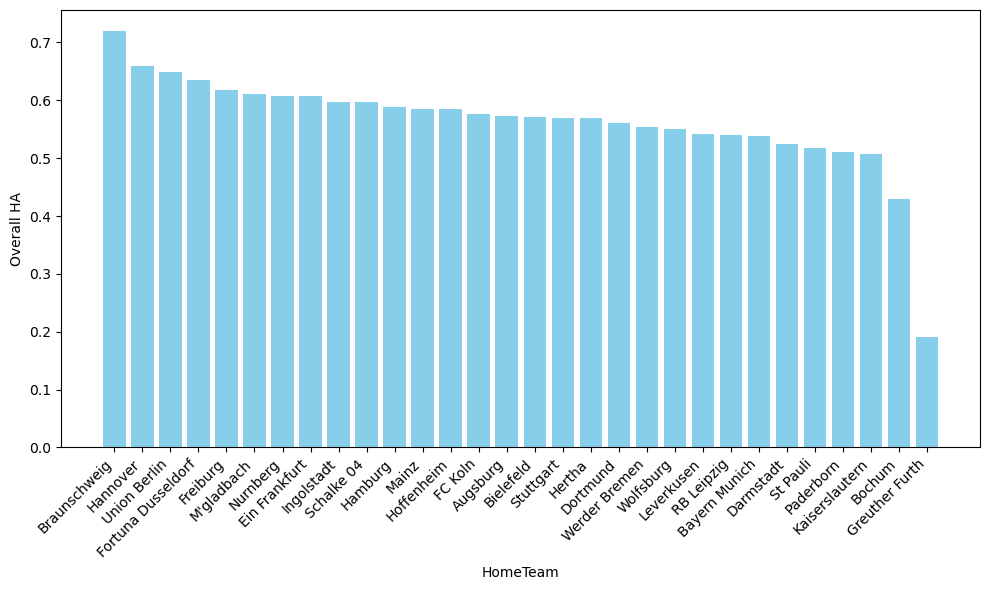

In [30]:
# Sort the DataFrame by 'OverallHA' column in descending order
total_points = total_points.sort_values(by='OverallHA', ascending=False)

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(total_points['HomeTeam'], total_points['OverallHA'], color='skyblue')
plt.xlabel('HomeTeam')
plt.ylabel('Overall HA')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

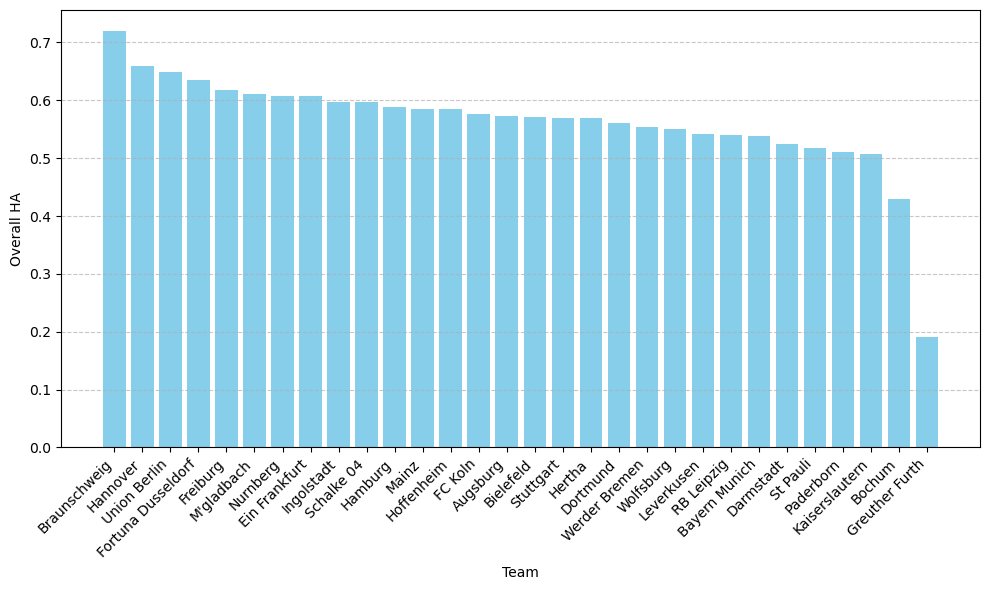

In [31]:
# Sort the DataFrame by 'OverallHA' column in descending order
total_points = total_points.sort_values(by='OverallHA', ascending=False)

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(total_points['HomeTeam'], total_points['OverallHA'], color='skyblue')
plt.xlabel('Team')
plt.ylabel('Overall HA')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [32]:
#Pre and during covid average home advantages 

ha_average_pre = round(bundesliga.loc[:3283,'HAPreCovid'].mean(),6)
ha_average_during = round(bundesliga.loc[3283:,'HADuringCovid'].mean(),6)
ha_average = round(bundesliga.loc[:, 'OverallHA'].mean(),6)


ha_means = {
            'Pre Covid Average Home Advanatge':[ha_average_pre],
           'During Covid Average Home Advanatge': [ha_average_during],
           'Overall Average Home Advanatge': [ha_average]}

ha_means = pd.DataFrame(ha_means)

ha_means

,Pre Covid Average Home Advanatge,During Covid Average Home Advanatge,Overall Average Home Advanatge
0,0.582453,0.536614,0.577429


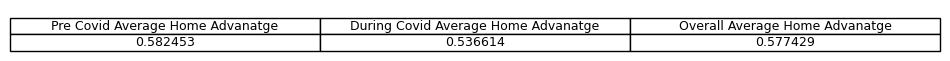

In [34]:

fig = plt.figure(figsize = (12,.1))
ax = fig.add_subplot(111)


ax.table(cellText = ha_means.values, 
         colLabels = ha_means.columns, cellLoc='center')


#turn axes off
ax.axis('off')
plt.show()

In [ ]:
#Home Goals 
plt.scatter(x=bundesliga['Attendance'], y=bundesliga['FTHG'], label='Home Goals', alpha=0.7,)
coefficients_total = np.polyfit(bundesliga['Attendance'], bundesliga['FTHG'], 1)
line_of_best_fit_total = np.polyval(coefficients_total, bundesliga['Attendance'])
plt.plot(bundesliga['Attendance'], line_of_best_fit_total, color='blue')

#Away Goals
plt.scatter(x=bundesliga['Attendance'], y=bundesliga['FTAG'], label='Away Goals', alpha=0.7)
coefficients_away = np.polyfit(bundesliga['Attendance'], bundesliga['FTAG'], 1)
line_of_best_fit_away = np.polyval(coefficients_away, bundesliga['Attendance'])
plt.plot(bundesliga['Attendance'], line_of_best_fit_away, color='orange')


plt.xlabel('Attendance')
plt.ylabel('Goals')
plt.legend(loc='center left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
##Removing Greuther Furth 
bundesliga = bundesliga[bundesliga['HomeTeam']!='Greuther Furth']

In [ ]:
joint_plot = sns.jointplot(x="Attendance", y="OverallHA", data=bundesliga, kind='reg', fit_reg=True,scatter_kws={'s': 10})

# Set individual axis labels
joint_plot.set_axis_labels('Attendance', 'Home Advantage')


# Show the plot
plt.show()

# Cluster Analysis

## Attendance and pre covid ha

In [35]:
##Removing Greuther Furth 
bundesliga = bundesliga[bundesliga['HomeTeam']!='Greuther Furth']

In [36]:
#Creating two new data frames from the columns 'PreCovid'
bundesliga_pre_covid = bundesliga[bundesliga['PreCovid'] == True]
bundesliga_during_covid = bundesliga[bundesliga['PreCovid'] == False]


In [37]:
bundesliga_pre_covid.describe().T

,count,mean,std,min,25%,50%,75%,max
FTHG,3266.0,1.649112,1.355820,0.0000,1.000000,1.000000,2.000000,9.000000
FTAG,3266.0,1.288120,1.217016,0.0000,0.000000,1.000000,2.000000,8.000000
HTHG,3266.0,0.728414,0.849845,0.0000,0.000000,1.000000,1.000000,6.000000
HTAG,3266.0,0.554501,0.731023,0.0000,0.000000,0.000000,1.000000,4.000000
HS,3266.0,14.255052,5.140076,1.0000,11.000000,14.000000,17.000000,36.000000
AS,3266.0,11.647275,4.632056,0.0000,8.000000,11.000000,15.000000,33.000000
HST,3266.0,5.164115,2.631301,0.0000,3.000000,5.000000,7.000000,15.000000
AST,3266.0,4.242805,2.406758,0.0000,2.000000,4.000000,6.000000,14.000000
HF,3266.0,14.198408,4.530497,2.0000,11.000000,14.000000,17.000000,32.000000
AF,3266.0,15.138089,4.781496,1.0000,12.000000,15.000000,18.000000,32.000000


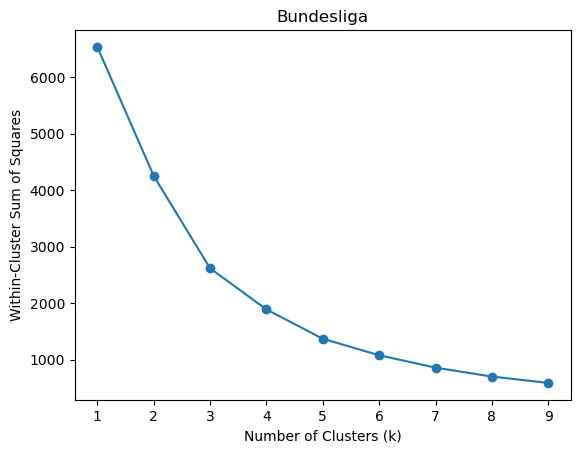

In [38]:
#Extracting the features
select_features = bundesliga_pre_covid[['Attendance','HAPreCovid']]

#Scaling the features
scaler = StandardScaler()
select_features_standardised = scaler.fit_transform(select_features)

#Elbow method 
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(select_features_standardised)
    inertia.append(kmeans.inertia_)

#Plot the Elbow Method
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Bundesliga')
plt.show()

C:\Users\c2002942\AppData\Local\Temp\ipykernel_13600\2663852681.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bundesliga_pre_covid['Cluster'] = kmeans.fit_predict(select_features_standardised)


Cluster
0    1204
2    1175
1     887
Name: count, dtype: int64


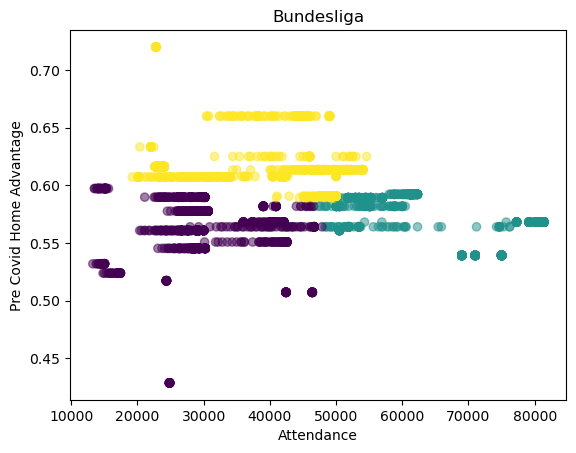

,HAPreCovid,Attendance
Cluster,,
0,0.561711,31127.0
1,0.571436,64754.0
2,0.617667,39787.0


In [39]:
#choosing K
optimal_k = 3

# Apply K-means clustering with the chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
bundesliga_pre_covid['Cluster'] = kmeans.fit_predict(select_features_standardised)

# Display the cluster assignments
print(bundesliga_pre_covid['Cluster'].value_counts())


#Plot the clusters
plt.scatter(bundesliga_pre_covid['Attendance'], bundesliga_pre_covid['HAPreCovid'], c=bundesliga_pre_covid['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Attendance')
plt.ylabel('Pre Covid Home Advantage')
plt.title('Bundesliga')
plt.show()


#cluster summary
cluster_summary = bundesliga_pre_covid.groupby('Cluster')[['HAPreCovid', 'Attendance']].mean()
cluster_sizes = bundesliga_pre_covid['Cluster'].value_counts().sort_index()


# Round 'Attendance' values to 0 decimal places
cluster_summary['Attendance'] = cluster_summary['Attendance'].round(0)

cluster_summary


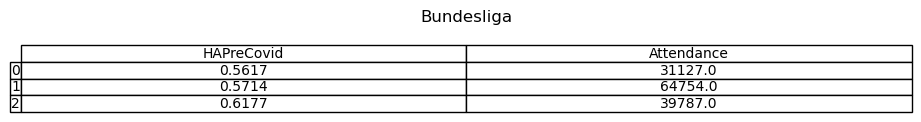

In [40]:

fig = plt.figure(figsize = (11.5, .2))
ax = fig.add_subplot(111)

cluster_summary = round(cluster_summary,4)

ax.table(cellText = cluster_summary.values, rowLabels = cluster_summary.index, 
         colLabels = cluster_summary.columns, cellLoc='center')

#add title to table
ax.set_title('Bundesliga')

#turn axes off
ax.axis('off')
plt.show()

## Match Statistic and HA 

### pre covid

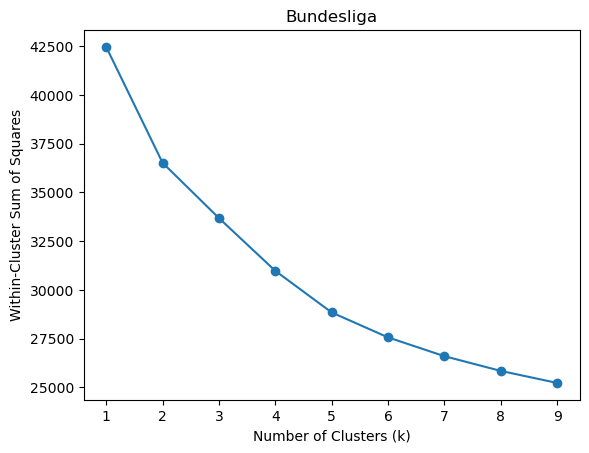

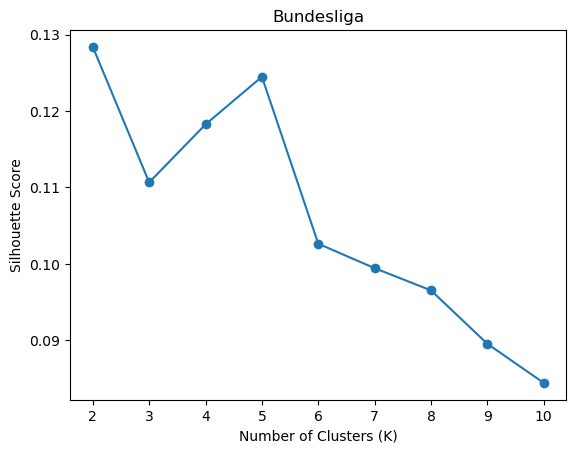

In [41]:
# Select features for clustering
select_features = bundesliga_pre_covid[['HS', 'AS', 'HST', 'AST', 'HC','AC','HF', 'AF', 'HY','AY','HR','AR', 'HAPreCovid']]

# Standardize the features
scaler = StandardScaler()
select_features_standardised = scaler.fit_transform(select_features)


#Elbow method 
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(select_features_standardised)
    inertia.append(kmeans.inertia_)

#Plot the Elbow Method
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Bundesliga')
plt.show()



# Evaluate silhouette scores for different values of K
silhouette_scores = []
for k in range(2, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(select_features_standardised)
    silhouette_avg = silhouette_score(select_features_standardised, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Method
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Bundesliga')
plt.show()

In [42]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
bundesliga_pre_covid['Cluster'] = kmeans.fit_predict(select_features_standardised)

# Display the cluster assignments
print(bundesliga_pre_covid['Cluster'].value_counts())

#cluster summary 
cluster_summary = bundesliga_pre_covid.groupby('Cluster')[[ 'HS', 'AS', 'HST', 'AST', 'HC','AC','HF', 'AF', 'HY','AY','HR','AR','HAPreCovid']].mean()
cluster_summary

Cluster
2    1182
1    1084
0    1000
Name: count, dtype: int64


C:\Users\c2002942\AppData\Local\Temp\ipykernel_13600\3547493920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bundesliga_pre_covid['Cluster'] = kmeans.fit_predict(select_features_standardised)


,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HAPreCovid
Cluster,,,,,,,,,,,,,
0,18.902000,8.740000,7.314000,3.022000,7.324000,3.118000,11.699000,13.699000,1.070000,1.763000,0.019000,0.10900,0.571264
1,11.337638,15.806273,3.978782,6.204797,4.113469,6.112546,13.441882,13.345018,1.607011,1.537823,0.095018,0.04059,0.588817
2,12.999154,10.292724,4.432318,3.476311,4.961083,3.719966,17.006768,18.000000,2.107445,2.500846,0.102369,0.12775,0.591693


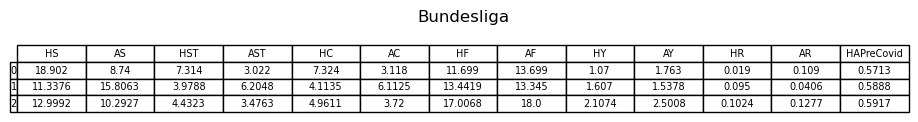

In [43]:

fig = plt.figure(figsize = (11.5, .2))
ax = fig.add_subplot(111)

cluster_summary = round(cluster_summary,4)

ax.table(cellText = cluster_summary.values, rowLabels = cluster_summary.index, 
         colLabels = cluster_summary.columns, cellLoc='center')

#add title to table
ax.set_title('Bundesliga')

#turn axes off
ax.axis('off')
plt.show()

### during covid

C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.p

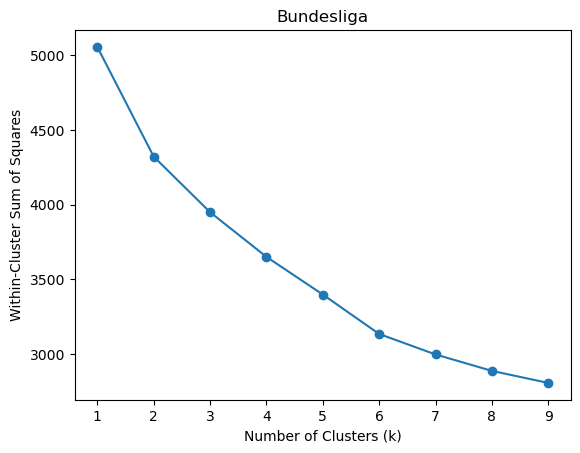

C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.p

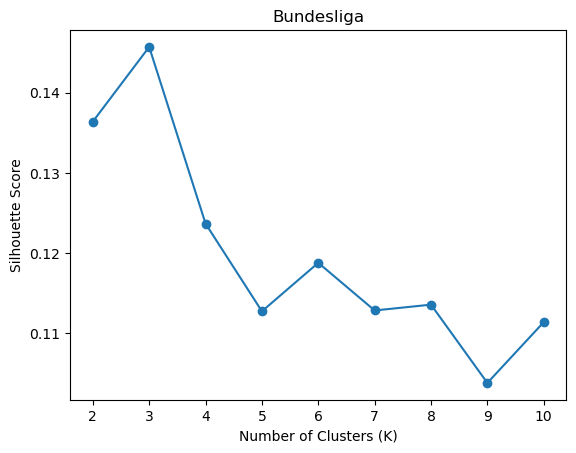

In [44]:
# Select features for clustering
select_features = bundesliga_during_covid[['HS', 'AS', 'HST', 'AST', 'HC','AC','HF', 'AF', 'HY','AY','HR','AR','HADuringCovid']]

# Standardize the features
scaler = StandardScaler()
select_features_standardised = scaler.fit_transform(select_features)


#Elbow method 
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(select_features_standardised)
    inertia.append(kmeans.inertia_)

#Plot the Elbow Method
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Bundesliga')
plt.show()



# Evaluate silhouette scores for different values of K
silhouette_scores = []
for k in range(2, 11):  # You can adjust the range as needed
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(select_features_standardised)
    silhouette_avg = silhouette_score(select_features_standardised, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Method
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Bundesliga')
plt.show()

In [45]:
optimal_k = 3 
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
bundesliga_during_covid['Cluster'] = kmeans.fit_predict(select_features_standardised)

# Display the cluster assignments
print(bundesliga_during_covid['Cluster'].value_counts())

#cluster summary 
cluster_summary = bundesliga_during_covid.groupby('Cluster')[['HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR','HADuringCovid']].mean()
cluster_summary

C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cluster
1    190
0    178
2     21
Name: count, dtype: int64


C:\Users\c2002942\AppData\Local\Temp\ipykernel_13600\2962746730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bundesliga_during_covid['Cluster'] = kmeans.fit_predict(select_features_standardised)


,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HADuringCovid
Cluster,,,,,,,,,,,,,
0,9.904494,14.904494,3.415730,5.702247,3.550562,5.730337,12.398876,12.308989,1.921348,1.792135,0.0,0.028090,0.539061
1,16.089474,8.515789,6.368421,3.057895,6.136842,3.178947,12.147368,12.652632,1.626316,1.957895,0.0,0.100000,0.536098
2,12.285714,13.857143,4.285714,5.238095,3.809524,5.333333,12.666667,13.285714,2.952381,2.285714,1.0,0.142857,0.520529


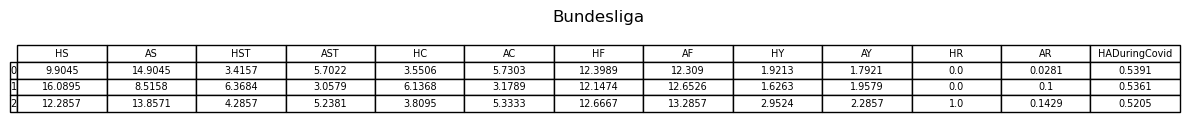

In [47]:

fig = plt.figure(figsize = (15, .2))
ax = fig.add_subplot(111)

cluster_summary = round(cluster_summary,4)

ax.table(cellText = cluster_summary.values, rowLabels = cluster_summary.index, 
         colLabels = cluster_summary.columns, cellLoc='center')

#add title to table
ax.set_title('Bundesliga')

#turn axes off
ax.axis('off')
plt.show()